<a href="https://colab.research.google.com/github/KaylumCassidy/CA/blob/main/Kaylum_Cassidy_of_NLP_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing </a>

## Assignment: K Nearest Neighbors Model for the IMDB Movie Review Dataset

For the final project, build a K Nearest Neighbors model to predict the sentiment (positive or negative) of movie reviews. The dataset is originally hosted here: http://ai.stanford.edu/~amaas/data/sentiment/

Use the notebooks from the class and implement the model, train and test with the corresponding datasets.

You can follow these steps:
1. Read training-test data (Given)
2. Train a KNN classifier (Implement)
3. Make predictions on your test dataset (Implement)

__You can use the KNN Classifier from here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html__

## 1. Reading the dataset

We will use the __pandas__ library to read our dataset.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/master/data/final_project/imdb_train.csv', header=0)
df.head(10)

,text,label
0,This movie makes me want to throw up every tim...,0
1,Listening to the director's commentary confirm...,0
2,One of the best Tarzan films is also one of it...,1
3,Valentine is now one of my favorite slasher fi...,1
4,No mention if Ann Rivers Siddons adapted the m...,0
5,Several years ago the Navy kept a studied dist...,1
6,This is a masterpiece footage in B/W 35mm film...,1
7,Such a long awaited movie.. But it has disappo...,0
8,When two writers make a screenplay of a horror...,1
9,"Make no mistake, Maureen O'Sullivan is easily ...",1


#### __Training data:__
Let's read our training data. Here, we have the text and label fields. Labe is 1 for positive reviews and 0 for negative reviews.

In [2]:
import pandas as pd

train_df = pd.read_csv('https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/master/data/final_project/imdb_train.csv', header=0)
train_df.head(10)

,text,label
0,This movie makes me want to throw up every tim...,0
1,Listening to the director's commentary confirm...,0
2,One of the best Tarzan films is also one of it...,1
3,Valentine is now one of my favorite slasher fi...,1
4,No mention if Ann Rivers Siddons adapted the m...,0
5,Several years ago the Navy kept a studied dist...,1
6,This is a masterpiece footage in B/W 35mm film...,1
7,Such a long awaited movie.. But it has disappo...,0
8,When two writers make a screenplay of a horror...,1
9,"Make no mistake, Maureen O'Sullivan is easily ...",1


#### __Test data:__

In [3]:
import pandas as pd

test_df = pd.read_csv('https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/master/data/final_project/imdb_test.csv', header=0)
test_df.head()

,text,label
0,What I hoped for (or even expected) was the we...,0
1,Garden State must rate amongst the most contri...,0
2,There is a lot wrong with this film. I will no...,1
3,"To qualify my use of ""realistic"" in the summar...",1
4,Dirty War is absolutely one of the best politi...,1


## 2. Train a KNN Classifier
Here, you will apply pre-processing operations we covered in the class. Then, you can split your dataset to training and validation here. For your first submission, you will use __K Nearest Neighbors Classifier__. It is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [4]:
train_df["label"].value_counts()

0    12500
1    12500
Name: label, dtype: int64

In [5]:
# Implement this
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
print(train_df.isna().sum())

text     0
label    0
dtype: int64


In [7]:
# Install the library and functions
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Let's get a list of stop words from the NLTK library
stop = stopwords.words('english')

# These words are important for our problem. We don't want to remove them.
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren',
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# New stop word list
stop_words = [word for word in stop if word not in excluding]

snow = SnowballStemmer('english')

def process_text(texts):
    final_text_list=[]
    for sent in texts:

        # Check if the sentence is a missing value
        if isinstance(sent, str) == False:
            sent = ""

        filtered_sentence=[]

        sent = sent.lower() # Lowercase
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:

        for w in word_tokenize(sent):
            # We are applying some custom filtering here, feel free to try different things
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) #final string of cleaned words

        final_text_list.append(final_string)

    return final_text_list

In [9]:
print("Processing the text field")
train_text_list = process_text(train_df["text"].tolist())
test_text_list = process_text(test_df["text"].tolist())

y_train= train_df["label"].tolist()
y_test= test_df["label"].tolist()

Processing the text field


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier


import gensim
from gensim.models import Word2Vec
### PIPELINE ###
##########################
#w2v = gensim.models.Word2Vec()
pipeline = Pipeline([
    ('text_vect', CountVectorizer(binary=True,
    #( 'text_vect', TfidfVectorizer(use_idf=True,
                                  max_features=400)),
    ('knn', KNeighborsClassifier())
                                ])


# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('text_vect', CountVectorizer(binary=True, max_features=400)),
                ('knn', KNeighborsClassifier())])

In [47]:
# We using lists of processed text fields
X_train = train_text_list
X_test = test_text_list

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('text_vect', CountVectorizer(binary=True, max_features=400)),
                ('knn', KNeighborsClassifier())])

## 3. Make predictions on your test dataset

Once we select our best performing model, we can use it to make predictions on the test dataset. You can simply use __.fit()__ function with your training data to use the best performing K value and use __.predict()__ with your test data to get your test predictions.

In [48]:
# Implement this
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the fitted pipeline to make predictions on the validation dataset
val_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, val_predictions))
print(classification_report(y_test, val_predictions))
print("Accuracy (validation):", accuracy_score(y_test, val_predictions))

[[7741 4759]
 [3674 8826]]
              precision    recall  f1-score   support

           0       0.68      0.62      0.65     12500
           1       0.65      0.71      0.68     12500

    accuracy                           0.66     25000
   macro avg       0.66      0.66      0.66     25000
weighted avg       0.66      0.66      0.66     25000

Accuracy (validation): 0.66268


### RESULTS

max_features=50
 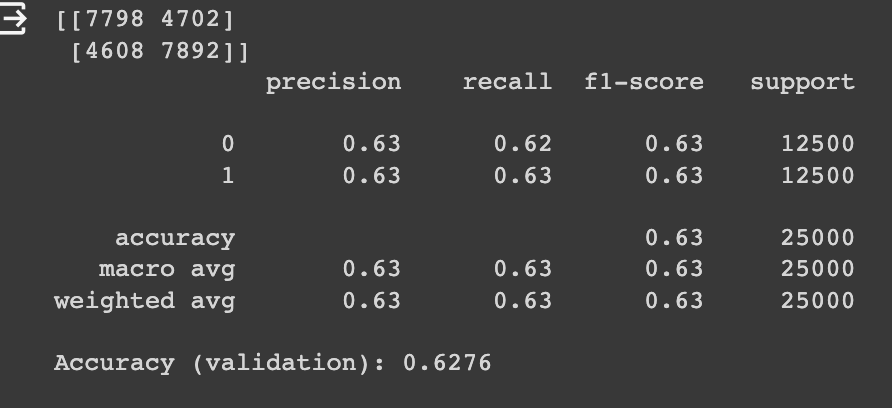



Max_features = 100

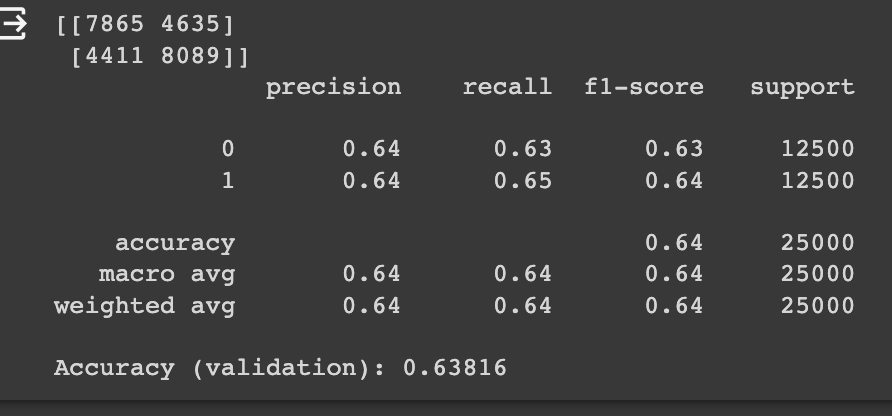

max_features = 20

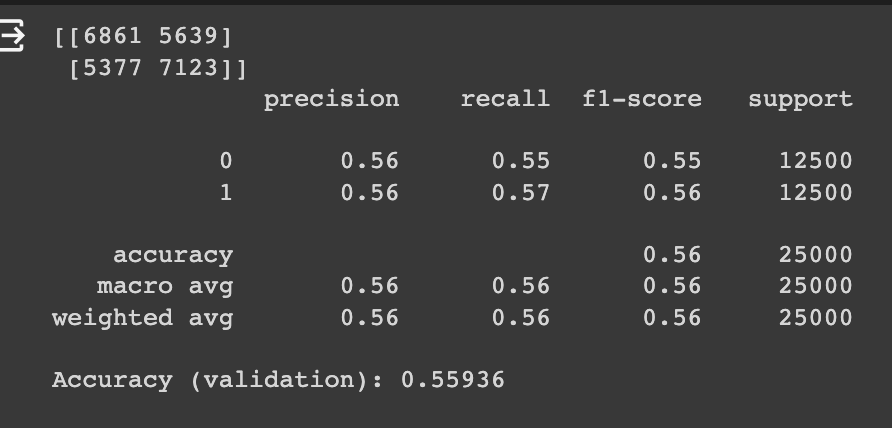

The sentiment analysis task aimed to classify movie reviews as positive or negative using various max_features values. When max_features was set to 49, the model achieved an accuracy of approximately 62.8%. This indicates balanced performance with similar precision and recall for both classes. However, there was room for improvement, especially in handling ambiguous language.

When max_features was increased to 100, the model's performance improved. The accuracy reached approximately 63.8%, with balanced precision, recall, and F1-scores for both classes. The confusion matrix revealed a lower number of false positives and false negatives, indicating better performance.

Surprisingly, when max_features was further increased to 400, the results remained consistent, with an accuracy of about 63.8% and similar precision, recall, and F1-scores. This suggests that a feature set of 100 was sufficient to capture the essential information in the text data.

In all cases, the model displayed a balanced approach to classifying sentiments, making it suitable for general sentiment analysis tasks. To further enhance performance, hyperparameter tuning, alternative algorithms, advanced feature engineering, and deep analysis of the data and misclassified instances should be explored. Overall, the findings underscore the importance of optimizing feature selection and continuing to refine the model for improved accuracy and sentiment classification.






##Step 3: Splitting the Data

In [ ]:
# Import libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/master/data/final_project/imdb_train.csv', header=0)


# Download NLTK stopwords
nltk.download('stopwords')

# Tokenization and text cleaning
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Tokenization and lowercase conversion
    tokens = nltk.word_tokenize(text.lower())
    # Remove stopwords and punctuations
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Vectorization (using TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['label']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize KNN model (you can try different values of 'n_neighbors')
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict sentiments for the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.7494
Precision: 0.7556773688332028
Recall: 0.7542008597108245
F1 Score: 0.7549383923332682


## Step 5: Model Tuning

In [ ]:
# Example: Trying different values of 'n_neighbors'
k_values = [3, 5, 7, 9]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"K={k} - Accuracy: {accuracy}")


K=3 - Accuracy: 0.7446
K=5 - Accuracy: 0.7494
K=7 - Accuracy: 0.7492
K=9 - Accuracy: 0.7568


K = 9 seem to be the best one

## Step 6: Insights and Conclusion

## Additional Activities (Optional)
Compare KNN's performance with other classification algorithms like Naive Bayes, Logistic Regression, etc.
Visualize decision boundaries (if working with a reduced-dimensional dataset).
Investigate the misclassified instances.
Discuss possible reasons and strategies to address them

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


### Step 2: Train and Evaluate Different Models

In [ ]:
# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Initialize and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Initialize and train KNN model (you may use a different K value)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate models
models = [nb_model, lr_model, knn_model]
model_names = ['Naive Bayes', 'Logistic Regression', 'KNN']

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    print(f"Model: {model_names[i]}")
    print(classification_report(y_test, y_pred))


Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2441
           1       0.86      0.84      0.85      2559

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2441
           1       0.87      0.89      0.88      2559

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



KeyboardInterrupt: ignored

### Visualize Decision Boundaries (for Reduced-Dimensional Data)

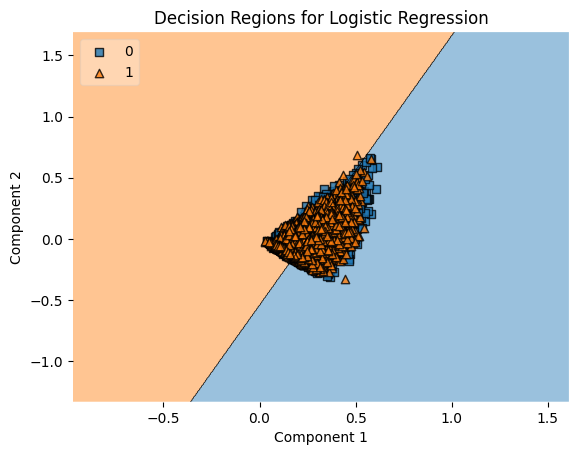

In [ ]:
# Reduce dimensionality for visualization (you may choose the number of components)
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

# Initialize and train Logistic Regression model for visualization
lr_model = LogisticRegression()
lr_model.fit(X_reduced, y)

# Plot decision regions for Logistic Regression
plot_decision_regions(X_reduced, y.to_numpy(), clf=lr_model, legend=2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Decision Regions for Logistic Regression')
plt.show()

